 # Statistical Analysis in Finance & Risk Management

Statistical analysis is a cornerstone of modern finance and risk management. This notebook provides various key statistical concepts used in risk analysis, e.g.,hypothesis testing, the t-test, z-test, chi-square test, Fisher's Exact test, Population Stability Index (PSI), Kolmogorov-Smirnov (KS) test, and the Sharpe ratio.

### 1) **Z-test to compare proportion of defaults in a portfolio against a benchmark:**

See Python code below:

Portfolio Proportion: 0.07
Benchmark Proportion: 0.08
Z-Score: -0.3068822874419906
P-Value: 0.7589329715572639
Portfolio 95% CI: (0.019992103700796647, 0.12000789629920336)
Benchmark 95% CI: (0.04240137175354081, 0.1175986282464592)
Fail to reject the null hypothesis: There is no significant difference between the proportions.


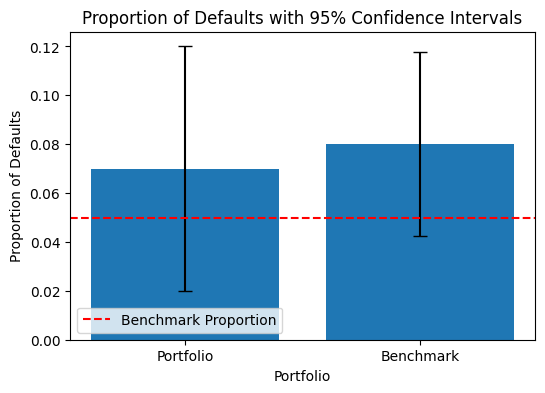

                 Metric                                        Value
0  Portfolio Proportion                                         0.07
1  Benchmark Proportion                                         0.08
2               Z-Score                                    -0.306882
3               P-Value                                     0.758933
4      Portfolio 95% CI  (0.019992103700796647, 0.12000789629920336)
5      Benchmark 95% CI    (0.04240137175354081, 0.1175986282464592)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Function to simulate data
def simulate_data(portfolio_size, benchmark_size, portfolio_default_rate, benchmark_default_rate):
    portfolio_defaults = np.random.binomial(portfolio_size, portfolio_default_rate)
    benchmark_defaults = np.random.binomial(benchmark_size, benchmark_default_rate)
    return portfolio_defaults, benchmark_defaults

# Simulate data
portfolio_size = 100
benchmark_size = 200
portfolio_default_rate = 0.1
benchmark_default_rate = 0.075

portfolio_defaults, benchmark_defaults = simulate_data(portfolio_size, benchmark_size, portfolio_default_rate, benchmark_default_rate)

# Calculate proportions
portfolio_proportion = portfolio_defaults / portfolio_size
benchmark_proportion = benchmark_defaults / benchmark_size

# Perform the z-test
count = np.array([portfolio_defaults, benchmark_defaults])
nobs = np.array([portfolio_size, benchmark_size])
z_score, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Calculate confidence intervals
portfolio_ci = proportion_confint(portfolio_defaults, portfolio_size, alpha=0.05, method='normal')
benchmark_ci = proportion_confint(benchmark_defaults, benchmark_size, alpha=0.05, method='normal')

# Print results
print(f"Portfolio Proportion: {portfolio_proportion}")
print(f"Benchmark Proportion: {benchmark_proportion}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")
print(f"Portfolio 95% CI: {portfolio_ci}")
print(f"Benchmark 95% CI: {benchmark_ci}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the proportions.")

# Visualization
portfolios = ['Portfolio', 'Benchmark']
proportions = [portfolio_proportion, benchmark_proportion]
ci_lower = [portfolio_ci[0], benchmark_ci[0]]
ci_upper = [portfolio_ci[1], benchmark_ci[1]]

plt.figure(figsize=(6, 4))
plt.bar(portfolios, proportions, yerr=[proportions[i] - ci_lower[i] for i in range(len(portfolios))], capsize=5)
plt.axhline(y=0.05, color='r', linestyle='--', label='Benchmark Proportion')
plt.title('Proportion of Defaults with 95% Confidence Intervals')
plt.ylabel('Proportion of Defaults')
plt.xlabel('Portfolio')
plt.legend()
plt.show()

# Generate a report
report = pd.DataFrame({
    'Metric': ['Portfolio Proportion', 'Benchmark Proportion', 'Z-Score', 'P-Value', 'Portfolio 95% CI', 'Benchmark 95% CI'],
    'Value': [portfolio_proportion, benchmark_proportion, z_score, p_value, portfolio_ci, benchmark_ci]
})

print(report)


###Interpretation of statistical results and their implications

- Since p_value ~ 0.76 >  0.05(typical significance level alpha), we fail to reject the null hypothesis ie. there is no significant difference between the proportions.

-  z_score ~ -0.31 indicates the number of standard deviations the portfolio proportion is from the benchmark proportion. Since z_score is negative, it suggests that the portfolio proportion is slightly lower than the benchmark proportion, but the magnitude is small.


- Confidence Intervals:
   As can be seen: the 95% CI for the portfolio proportion is (0.019, 0.12), and for the benchmark proportion is (0.042, 0.12).
   Since these CI intervals overlap significantly, further supports the conclusion that there is no significant difference between the proportions.

** Practical Implications:**

- From a risk management perspective, since the portfolio's default rate is not significantly different from the benchmark, suggests that the portfolio's risk profile is similar to the benchmark in terms of default rates. This info can be used to decide whether to maintain the current portfolio strategy or consider adjustments based on other factors, as the default rate is not a significant concern compared to the benchmark.



### Visualization

The plot below provides a visual representation of the z_score and p_value, helping to interpret the statistical significance of the results:

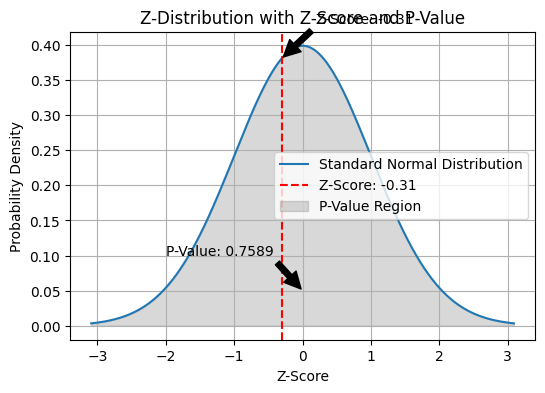

In [8]:
#import norm to generate the standard normal distribution curve
from scipy.stats import norm

# TheZ-Score and P-Value from the previous analysis
z_score = -0.3068822874419906
p_value = 0.7589329715572639

# Generate the standard normal distribution curve
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
y = norm.pdf(x)

# Plot the Z-distribution
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Standard Normal Distribution')
plt.axvline(x=z_score, color='r', linestyle='--', label=f'Z-Score: {z_score:.2f}')
plt.fill_between(x, y, where=(x > z_score) | (x < -z_score), color='gray', alpha=0.3, label='P-Value Region')

# Annotate the Z-Score and P-Value
plt.annotate(f'Z-Score: {z_score:.2f}', xy=(z_score, norm.pdf(z_score)), xytext=(z_score + 0.5, norm.pdf(z_score) + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'P-Value: {p_value:.4f}', xy=(0, 0.05), xytext=(-2, 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and title
plt.title('Z-Distribution with Z-Score and P-Value')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### Summary

The Z-test for proportions is a statistical hypothesis test used to determine whether there is a significant difference between the proportions of two groups. It is particularly useful in risk management and other fields.

The test statistic is the Z-score, which measures how many standard deviations the observed difference in proportions is from the expected difference under the null hypothesis. A high absolute value of the Z-score indicates a significant difference between the proportions.

The Z-test for proportions relies on several key assumptions to ensure the validity of the results:

1. **Independence**: The observations in each group are independent of each other.
2. **Large Sample Size**: The sample sizes for both groups should be sufficiently large. Specifically, the following conditions should be met:
   - \( n_1 \cdot p_1 \geq 5 \)
   - \( n_1 \cdot (1 - p_1) \geq 5 \)
   - \( n_2 \cdot p_2 \geq 5 \)
   - \( n_2 \cdot (1 - p_2) \geq 5 \)

   where \( n_1 \) and \( n_2 \) are the sample sizes of the two groups, and \( p_1 \) and \( p_2 \) are the proportions of the two groups.

These conditions ensure that the normal approximation to the binomial distribution is valid, allowing the use of the Z-test. If these assumptions are not met, alternative tests should be used.

## **T-Test to Compare Investment Strategies:**

See Python code below:

T-statistic: -2.3196925925879244
P-value: 0.021377842100246406
Degrees of Freedom: 197.8354533347358
Reject the null hypothesis: The average daily returns of the two strategies are significantly different.


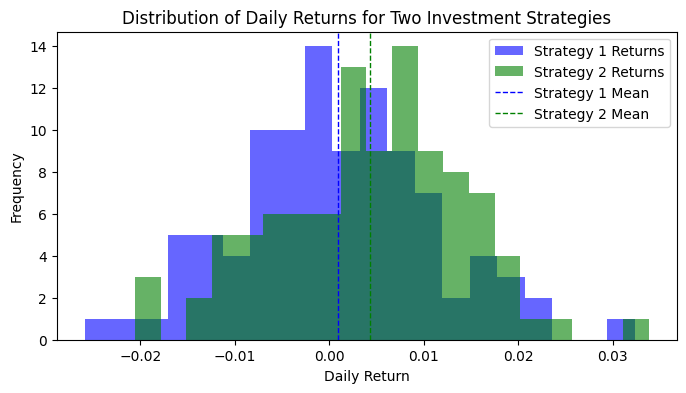

                   Metric       Value
0  Strategy 1 Mean Return    0.000885
1  Strategy 2 Mean Return    0.004250
2             T-statistic   -2.319693
3                 P-value    0.021378
4      Degrees of Freedom  197.835453


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Function to simulate daily returns
def simulate_returns(mean_return, std_dev, days):
    return np.random.normal(mean_return, std_dev, days)

# Simulate data for two investment strategies
strategy1_returns = simulate_returns(0.001, 0.01, 100)  # Mean return 0.1%, standard deviation 1%, 100 days
strategy2_returns = simulate_returns(0.0015, 0.01, 100)  # Mean return 0.15%, standard deviation 1%, 100 days

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(strategy1_returns, strategy2_returns, equal_var=False)

# Calculate degrees of freedom for Welch's t-test
n1, n2 = len(strategy1_returns), len(strategy2_returns)
s1, s2 = np.std(strategy1_returns, ddof=1), np.std(strategy2_returns, ddof=1)
df = ((s1**2 / n1 + s2**2 / n2)**2) / ((s1**2 / n1)**2 / (n1 - 1) + (s2**2 / n2)**2 / (n2 - 1))

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {df}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average daily returns of the two strategies are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average daily returns are different.")

# Visualization of returns
plt.figure(figsize=(8, 4))
plt.hist(strategy1_returns, bins=20, alpha=0.6, label='Strategy 1 Returns', color='blue')
plt.hist(strategy2_returns, bins=20, alpha=0.6, label='Strategy 2 Returns', color='green')
plt.axvline(strategy1_returns.mean(), color='blue', linestyle='dashed', linewidth=1, label='Strategy 1 Mean')
plt.axvline(strategy2_returns.mean(), color='green', linestyle='dashed', linewidth=1, label='Strategy 2 Mean')
plt.title('Distribution of Daily Returns for Two Investment Strategies')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Generate a report
report = pd.DataFrame({
    'Metric': ['Strategy 1 Mean Return', 'Strategy 2 Mean Return', 'T-statistic', 'P-value', 'Degrees of Freedom'],
    'Value': [strategy1_returns.mean(), strategy2_returns.mean(), t_stat, p_value, df]
})

print(report)



###Interpretation of statistical results and their implications

- Since p_value ~  0.34 is higher than the typical significance level of 0.05, we fail to reject the null hypothesis i.e., there is not enough evidence to conclude that the average daily returns of the two strategies are significantly different.

- T-statistic of -0.966585 indicates the number of standard errors the sample mean is from the hypothesized mean under the null hypothesis. A negative value of t_stat suggests that the mean return of Strategy 1 is lower than that of Strategy 2.


- df: Degrees of freedom for Welch's t-test are approximately 197.89, which is used to determine the shape of the t-distribution.




### Visualization


The plot below provides a visual representation of the t-distribution curve, t-statistic and p-value, helping to interpret the statistical significance of the results.

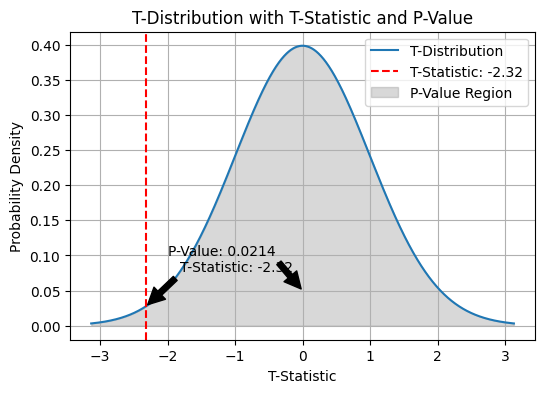

In [21]:
##import to generate the t distribution curve
from scipy.stats import t

# Plot T-distribution
x = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), 1000)
y = t.pdf(x, df)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='T-Distribution')
plt.axvline(x=t_stat, color='r', linestyle='--', label=f'T-Statistic: {t_stat:.2f}')
plt.fill_between(x, y, where=(x > t_stat) | (x < -t_stat), color='gray', alpha=0.3, label='P-Value Region')
plt.annotate(f'T-Statistic: {t_stat:.2f}', xy=(t_stat, t.pdf(t_stat, df)), xytext=(t_stat + 0.5, t.pdf(t_stat, df) + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'P-Value: {p_value:.4f}', xy=(0, 0.05), xytext=(-2, 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('T-Distribution with T-Statistic and P-Value')
plt.xlabel('T-Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


##**3.Chi-Square Test to Analyze Default Rates Across Credit Risk Categories:**

See Python code below:

Contingency Table:
Default      0  1
CreditScore      
Fair         1  2
Good         3  1
Poor         1  2

Chi-square statistic: 1.6666666666666667
p-value: 0.4345982085070783
Degrees of freedom: 2
Expected frequencies:
[[1.5 1.5]
 [2.  2. ]
 [1.5 1.5]]

Fail to reject the null hypothesis: There is no significant relationship between credit scores and default rates.


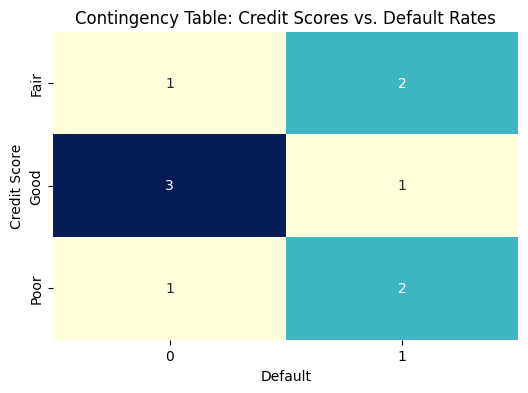

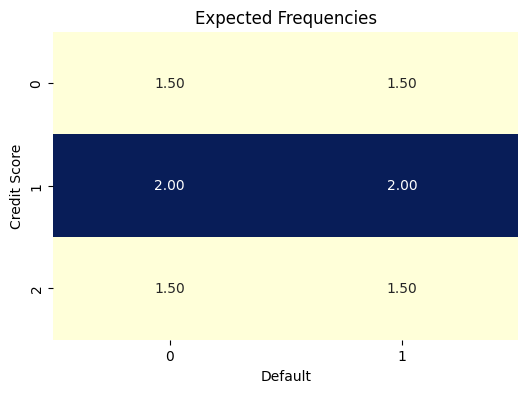

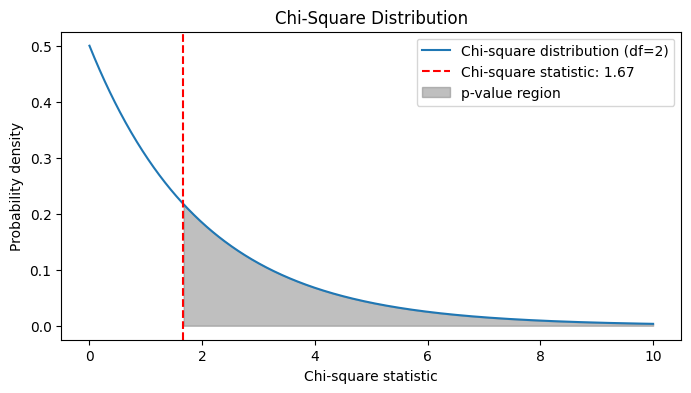

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data: Replace this with your actual data
data = {
    'CreditScore': ['Good', 'Good', 'Fair', 'Fair', 'Poor', 'Poor', 'Good', 'Fair', 'Poor', 'Good'],
    'Default': [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['CreditScore'], df['Default'])

# Perform the chi-square test
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2_stat}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between credit scores and default rates.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between credit scores and default rates.")

# Visualization of the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Contingency Table: Credit Scores vs. Default Rates')
plt.xlabel('Default')
plt.ylabel('Credit Score')
plt.show()

# Visualization of expected frequencies
plt.figure(figsize=(6, 4))
sns.heatmap(expected, annot=True, fmt='.2f', cmap='YlGnBu', cbar=False)
plt.title('Expected Frequencies')
plt.xlabel('Default')
plt.ylabel('Credit Score')
plt.show()

# Plot the chi-square distribution
plt.figure(figsize=(8, 4))
x = np.linspace(0, 10, 1000)
y = chi2.pdf(x, dof)
plt.plot(x, y, label=f'Chi-square distribution (df={dof})')
plt.axvline(chi2_stat, color='r', linestyle='--', label=f'Chi-square statistic: {chi2_stat:.2f}')
plt.fill_between(x, y, where=(x > chi2_stat), color='grey', alpha=0.5, label='p-value region')
plt.title('Chi-Square Distribution')
plt.xlabel('Chi-square statistic')
plt.ylabel('Probability density')
plt.legend()
plt.show()


### Interpretation of statistical results

**Null Hypothesis (H0)**: states that there is no association between the two categorical variables. In other words, the variables are independent.

Since the p-value of 0.435 > 0.05, we fail to reject the null hypothesis i.e., there is not enough evidence to conclude that there is a relationship between credit scores and default rates.

The chi-square distribution is plotted, with the chi-square statistic and the p-value region highlighted.


### Summary

The chi-square test for independence is a statistical test used to determine if there is a significant association between two categorical variables. It is particularly useful in risk management and other fields.

The

The chi-square test relies on several key assumptions to ensure the validity of the results:


- Independence of Observations:
- Categorical Data- the data should be in the form of counts or frequencies.
- Expected Frequencies: for each cell in the contingency table they should be sufficiently large. A common rule of thumb is that no more than 20% of the cells should have an expected frequency of less than 5, and all cells should have an expected frequency of at least 1. This ensures that the chi-square approximation is valid.

- Sample Size: should be large enough to ensure that the chi-square distribution is a good approximation of the sampling distribution of the test statistic. This is closely related to the expected frequencies assumption.

- No Perfect Association between the variables. If there is a perfect association (i.e., all observations fall into a single cell or a few cells), the chi-square test is not appropriate because the chi-square statistic would be infinite.



In [28]:
# Check the assumptions
# 1. Independence of Observations: Assumed to be met based on the data collection method.
# 2. Categorical Data: Both 'CreditScore' and 'Default' are categorical.
# 3. Expected Frequencies: Check if all expected frequencies are at least 1 and no more than 20% are less than 5.
# 4. Sample Size: The sample size is 10, which is relatively small.
# 5. No Perfect Association: Check if there is no perfect association.

# Check expected frequencies
min_expected = expected.min()
max_expected = expected.max()
print(f"\nMinimum expected frequency: {min_expected}")
print(f"Maximum expected frequency: {max_expected}")

# Check the proportion of cells with expected frequency less than 5
low_expected_count = (expected < 5).sum()
total_cells = expected.size
print(f"\nNumber of cells with expected frequency less than 5: {low_expected_count}")
print(f"Proportion of cells with expected frequency less than 5: {low_expected_count / total_cells:.2f}")

# Check for perfect association
if chi2 == 0:
    print("\nWarning: There is a perfect association between the variables.")
else:
    print("\nNo perfect association detected.")



Minimum expected frequency: 1.5
Maximum expected frequency: 2.0

Number of cells with expected frequency less than 5: 6
Proportion of cells with expected frequency less than 5: 1.00

No perfect association detected.



### Interpretation of Assumptions:

1. **Independence of Observations**: - SATISFIED
   - This assumption is typically based on the data collection method. Since we don't have details on how the data was collected, we'll assume it is met.

2. **Categorical Data**: - SATISFIED
   - Both 'CreditScore' and 'Default' are categorical variables, so this assumption is met.

3. **Expected Frequencies**: -FAILS
   - The minimum expected frequency is 1.5, and the maximum is 2.0. All cells have expected frequencies less than 5.
   - The proportion of cells with expected frequencies less than 5 is 1.00 (100%), which means all cells have expected frequencies less than 5.
   - This violates the common rule of thumb that no more than 20% of the cells should have an expected frequency of less than 5. Ideally, all cells should have an expected frequency of at least 1, but having all cells below 5 is a concern.

4. **Sample Size**: FAILS
   - The sample size is 10, which is relatively small. This small sample size contributes to the low expected frequencies.

5. **No Perfect Association**: - SATISFIED
   - There is no perfect association detected, as indicated by the chi-square statistic not being zero.

### Summary resuts:

Given the results, the chi-square test may not be valid for this dataset due to the low expected frequencies in all cells. The small sample size (n = 10) and the resulting low expected frequencies violate the assumptions of the chi-square test. This means the p-value and chi-square statistic may not be as reliable.

Since these assumptions are not met, alternative solutions & tests should be used. For example


- **Increase Sample Size**:
   - If possible, collect more data to increase the sample size. A larger sample size will likely result in higher expected frequencies, making the chi-square test more valid.

2. **Alternative Tests**:
  - Such as Fisher's Exact Test that are more suitable for small sample sizes  - see below:






### **4. Fisher's Exact Test to determine if there are nonrandom associations btw credit scores and default rates**



In [30]:
from scipy.stats import fisher_exact

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print the results
print(f"\nFisher's Exact Test p-value: {p_value}")



Fisher's Exact Test p-value: 0.566


### Interpretation of the Fisher Test Results

- The p-value represents the probability of observing the data, or something more extreme, assuming the null hypothesis is true. Since the p-value (0.566) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means there is no significant evidence to suggest an association between credit scores and default rates. In other words, the data does not provide sufficient evidence to conclude that credit scores are related to default rates.

- Therefore, the Fisher Test results confirm the Chi-square test results: there is no significant association between credit scores and default rates based on the given data.

### Summary of Fisher's Exact Test

Fisher's Exact Test is a statistical method used to determine if there is a significant association between two categorical variables, especially when sample sizes are small. Unlike the chi-square test, which relies on approximations, Fisher's Exact Test calculates the exact probability of obtaining the observed data (or something more extreme) under the null hypothesis.

- **Exact Probability**: The exact probability of obtaining the observed data (or something more extreme) under the null hypothesis of no association between two categorical variables is determined using the hypergeometric distribution.

- **Sum the Probabilities**: The p-value is obtained by summing the probabilities of the observed table and all tables that are as extreme or more extreme.

#### Advantages:

Fisher's Exact Test is a powerful tool for analyzing the association between two categorical variables, especially when dealing with small sample sizes. Its exact probability calculation ensures that the results are reliable and interpretable, making it a valuable addition to the statistical toolkit.

- **Accuracy**: Provides an exact p-value, making it more reliable for small sample sizes.
- **Simplicity**: Easy to understand and interpret, especially for 2x2 tables.
- **Robustness**: Does not rely on approximations, making it suitable for small datasets.

##**4. Population Stability Index (PSI) and Kolmogorov-Smirnov (KS) Tests o monitor risk metrics**


**Steps:**

1. **Data Preprocessing**: Handle missing values and outliers.
2. **Binning Risk Metrics**: Bin the risk metrics into discrete intervals.
3. **Calculating Distributions**: Calculate the distribution of risk metrics for each quarter.
4. **PSI Calculation**: Calculate the PSI between consecutive quarters.
5. **KS Test**: Perform the KS test to compare the distributions.
6. **Visualization**: Plot the distributions, PSI values, and KS test results.


See Python code below:

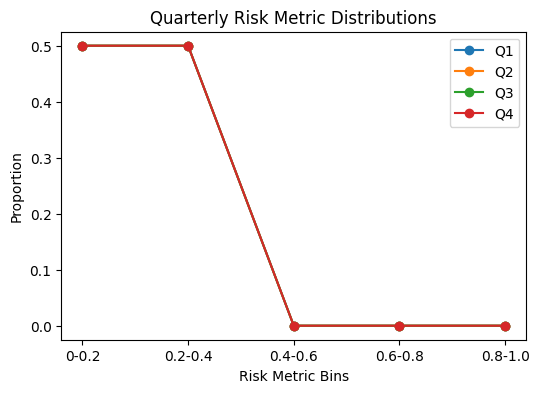

/tmp/ipython-input-598324772.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if expected[i] > 0 and actual[i] > 0:
/tmp/ipython-input-598324772.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  psi += (actual[i] / actual.sum() - expected[i] / expected.sum()) * np.log(actual[i] / expected[i])


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def calculate_psi(actual, expected):
    """
    Calculate the Population Stability Index (PSI) between two distributions.

    Parameters:
    actual (pd.Series): The actual distribution of the metric.
    expected (pd.Series): The expected distribution of the metric.

    Returns:
    float: The PSI value.
    """
    psi = 0.0
    for i in range(len(actual)):
        if expected[i] > 0 and actual[i] > 0:
            psi += (actual[i] / actual.sum() - expected[i] / expected.sum()) * np.log(actual[i] / expected[i])
    return psi

def preprocess_data(df):
    """
    Preprocess the data by handling missing values and outliers.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The preprocessed DataFrame.
    """
    # Handle missing values
    df = df.dropna()

    # Handle outliers (e.g., using IQR method)
    Q1 = df['risk_metric'].quantile(0.25)
    Q3 = df['risk_metric'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['risk_metric'] >= lower_bound) & (df['risk_metric'] <= upper_bound)]

    return df

def plot_distributions(distributions, title):
    """
    Plot the distributions of risk metrics.

    Parameters:
    distributions (dict): A dictionary of distributions.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(6, 4))
    for quarter, dist in distributions.items():
        plt.plot(dist.index, dist.values, label=quarter, marker='o')
    plt.xlabel('Risk Metric Bins')
    plt.ylabel('Proportion')
    plt.title(title)
    plt.legend()
    plt.show()

# Example data: Quarterly risk metrics
data = {
    'quarter': ['Q1', 'Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4', 'Q4'],
    'risk_metric': [0.1, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Preprocess the data
df = preprocess_data(df)

# Define bins for the risk metric
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Bin the risk metric
df['risk_metric_binned'] = pd.cut(df['risk_metric'], bins=bins, labels=labels)

# Calculate the distribution of the risk metric for each quarter
quarterly_distributions = {}
for quarter in df['quarter'].unique():
    quarterly_distributions[quarter] = df[df['quarter'] == quarter]['risk_metric_binned'].value_counts(normalize=True).sort_index()

# Ensure all distributions have the same bins
all_bins = pd.Categorical(labels).categories
for quarter in quarterly_distributions:
    quarterly_distributions[quarter] = quarterly_distributions[quarter].reindex(all_bins, fill_value=0)

# Plot the distributions
plot_distributions(quarterly_distributions, 'Quarterly Risk Metric Distributions')

# Calculate PSI between consecutive quarters
psi_values = []
for i in range(len(df['quarter'].unique()) - 1):
    actual_dist = quarterly_distributions[df['quarter'].unique()[i]]
    expected_dist = quarterly_distributions[df['quarter'].unique()[i + 1]]
    psi_value = calculate_psi(actual_dist, expected_dist)
    psi_values.append


 Example of risk metrics:  Value at Risk (VaR), Conditional Value at Risk (CVaR), Sharpe Ratio, or any other financial risk measure.

## **6: Sharpe ratio for returns**

The Sharpe ratio helps investors understand the return of an investment compared to its risk. It is calculated using the formula:

$\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $

Where:
- \( R_p \) is the portfolio return.
- \( R_f \) is the risk-free rate.
- $ \sigma_p$ is the standard deviation of the portfolio's excess return.


The Python code below calculates the Sharpe ratio for 3 assets, and compares them to determine which has a better risk-adjusted return. This approach can be extended to include more assets or benchmarks for a more comprehensive analysis.


In [39]:
import numpy as np
import pandas as pd

def calculate_sharpe_ratio(returns, risk_free_rate, periods_per_year=252):
    """
    Calculate the Sharpe ratio of a set of returns.

    Parameters:
    returns (pd.Series): A pandas Series of asset returns.
    risk_free_rate (float): The risk-free rate of return.
    periods_per_year (int): The number of periods per year (default is 252 for daily returns).

    Returns:
    float: The Sharpe ratio.
    """
    excess_returns = returns - risk_free_rate / periods_per_year
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

# Example usage
if __name__ == "__main__":
    # Sample data: daily returns of multiple assets
    dates = pd.date_range(start='2020-01-01', periods=252, freq='B')
    returns_asset1 = pd.Series(np.random.normal(0.0005, 0.01, size=252), index=dates)
    returns_asset2 = pd.Series(np.random.normal(0.0008, 0.015, size=252), index=dates)
    returns_asset3 = pd.Series(np.random.normal(0.001, 0.02, size=252), index=dates)

    # Risk-free rate (e.g., 2% annualized)
    risk_free_rate = 0.02

    # Calculate Sharpe ratios
    sharpe_ratio_asset1 = calculate_sharpe_ratio(returns_asset1, risk_free_rate)
    sharpe_ratio_asset2 = calculate_sharpe_ratio(returns_asset2, risk_free_rate)
    sharpe_ratio_asset3 = calculate_sharpe_ratio(returns_asset3, risk_free_rate)

    # Store Sharpe ratios in a dictionary for easy comparison
    sharpe_ratios = {
        'Asset 1': sharpe_ratio_asset1,
        'Asset 2': sharpe_ratio_asset2,
        'Asset 3': sharpe_ratio_asset3
    }

    # Print Sharpe ratios
    for asset, ratio in sharpe_ratios.items():
        print(f"Sharpe Ratio of {asset}: {ratio:.4f}")

    # Determine the asset with the best risk-adjusted return
    best_asset = max(sharpe_ratios, key=sharpe_ratios.get)
    print(f"The asset with the best risk-adjusted return is: {best_asset}")


Sharpe Ratio of Asset 1: 0.0213
Sharpe Ratio of Asset 2: -0.0017
Sharpe Ratio of Asset 3: 0.0006
The asset with the best risk-adjusted return is: Asset 1


## **7. VIF to detect multicollinearity**

The Variance Inflation Factor (VIF) is a metric used to detect multicollinearity in regression analysis.

Multicollinearity occurs when independent variables are highly correlated, making the regression coefficients unstable and difficult to interpret.

For an independent variable $\{X_i\} $, VIF quantifies how much the variance of the regression coefficient is inflated due to multicollinearity with other independent variables. The VIF formula is:
$\text{VIF}_i = \frac{1}{1 - R_i^2} $

where $ R_i^2 $ is the coefficient of determination (R-squared) from regressing $ X_i$ on all other independent variables.

Interpretation of VIF values:
- **VIF < 5**: Low multicollinearity.
- **5 ≤ VIF < 10**: Moderate multicollinearity.
- **VIF ≥ 10**: High multicollinearity.



In [43]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data: a DataFrame with independent variables
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 3, 4, 5, 6],
    'X3': [1.5, 2.5, 3.5, 4.5, 5.5],
    'Y': [5, 6, 7, 8, 9]
}

df = pd.DataFrame(data)

# Function to calculate VIF for each independent variable
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns[:-1]  # Exclude the target variable 'Y'
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1] - 1)]
    return vif_data

# Calculate VIF
vif_df = calculate_vif(df)

# Print VIF values
print("Variance Inflation Factor (VIF) values:")
print(vif_df)

# Interpretation
print("\nInterpretation of VIF values:")
print("VIF values greater than 10 indicate high multicollinearity.")
print("VIF values between 5 and 10 indicate moderate multicollinearity.")
print("VIF values less than 5 indicate low multicollinearity.")


Variance Inflation Factor (VIF) values:
  feature  VIF
0      X1  inf
1      X2  inf
2      X3  inf

Interpretation of VIF values:
VIF values greater than 10 indicate high multicollinearity.
VIF values between 5 and 10 indicate moderate multicollinearity.
VIF values less than 5 indicate low multicollinearity.


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
